# Final Processing
The final processing stage requires:
1. Quick validation of catalogues and Bayesian Pvalue maps
2. Skewness level
3. Adding flag to catalogue

In [1]:
import seaborn as sns
from astropy.table import Table
%matplotlib inline
import numpy as np
import pylab as plt

## Read tables

In [3]:
cat=Table.read('./data/dmu26_XID+SPIRE_HDF-N_cat.fits')


In [4]:
cat[0:10]

HELP_ID,RA,Dec,F_SPIRE_250,FErr_SPIRE_250_u,FErr_SPIRE_250_l,F_SPIRE_350,FErr_SPIRE_350_u,FErr_SPIRE_350_l,F_SPIRE_500,FErr_SPIRE_500_u,FErr_SPIRE_500_l,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500,Sig_conf_SPIRE_250,Sig_conf_SPIRE_350,Sig_conf_SPIRE_500,Rhat_SPIRE_250,Rhat_SPIRE_350,Rhat_SPIRE_500,n_eff_SPIRE_250,n_eff_SPIRE_500,n_eff_SPIRE_350,Pval_res_250,Pval_res_350,Pval_res_500
,degrees,degrees,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
HELP_J123716.657+620850.735,189.319403324303,62.1474264398889,0.90698683,2.1895704,0.23715529,1.4552047,3.6345878,0.38628927,3.3725872,7.7453823,0.7845506,-3.9635403,-6.6554766,-15.824505,4.1047807,5.2958326,8.8941145,0.9997474,0.99928284,1.0005604,2000.0,2000.0,2000.0,1.0,1.0,1.0
HELP_J123717.015+620847.945,189.320893894303,62.1466512998889,1.5452567,3.4115956,0.49063066,3.0674083,5.639085,0.9657896,7.133442,12.466115,2.547841,-3.9635403,-6.6554766,-15.824505,4.1047807,5.2958326,8.8941145,0.99877304,1.0004162,0.9987894,2000.0,2000.0,2000.0,1.0,1.0,1.0
HELP_J123659.934+620821.677,189.249725584303,62.139354599888904,1.1073737,2.3466573,0.32849917,0.87935066,2.1201508,0.23299861,1.071515,2.86009,0.2611662,-3.9635403,-6.6554766,-15.824505,4.1047807,5.2958326,8.8941145,0.9993166,0.9984722,0.9995901,2000.0,2000.0,2000.0,1.0,1.0,1.0
HELP_J123702.953+620752.022,189.26230550513802,62.13111716971174,0.879695,2.1858077,0.22861305,1.7964752,4.2893105,0.516988,4.191597,9.234916,1.1915643,-3.9635403,-6.6554766,-15.824505,4.1047807,5.2958326,8.8941145,0.99894494,0.9991399,1.0010924,2000.0,2000.0,2000.0,1.0,1.0,1.0
HELP_J123702.859+620836.779,189.261913014303,62.1435496798889,1.8580799,3.9821584,0.5381388,1.6197613,3.8455684,0.42433473,1.463931,3.780988,0.4160853,-3.9635403,-6.6554766,-15.824505,4.1047807,5.2958326,8.8941145,1.0003558,0.99882543,0.999334,2000.0,2000.0,2000.0,1.0,1.0,1.0
HELP_J123705.681+620844.678,189.273669184303,62.1457438498889,1.8369558,3.7671685,0.60735744,1.3019524,3.06351,0.3561233,1.4914681,3.9925132,0.37600693,-3.9635403,-6.6554766,-15.824505,4.1047807,5.2958326,8.8941145,0.99960554,0.99876744,0.9986738,2000.0,2000.0,2000.0,1.0,1.0,1.0
HELP_J123658.964+620755.885,189.245682505138,62.13219016971175,1.5374256,3.1626923,0.44343436,1.2043452,2.933647,0.29736173,1.9716465,4.485943,0.52082056,-3.9635403,-6.6554766,-15.824505,4.1047807,5.2958326,8.8941145,0.99849814,0.99892205,0.9981962,2000.0,2000.0,2000.0,1.0,1.0,1.0
HELP_J123704.146+620820.673,189.267275464303,62.1390758198889,0.75016904,1.8078301,0.20534973,0.84203225,2.0177245,0.22800377,1.2142835,3.1491964,0.30045277,-3.9635403,-6.6554766,-15.824505,4.1047807,5.2958326,8.8941145,0.99915177,0.9987195,0.99930286,2000.0,2000.0,2000.0,1.0,1.0,1.0


## Look at Symmetry of PDFs to determine depth level of catalogue

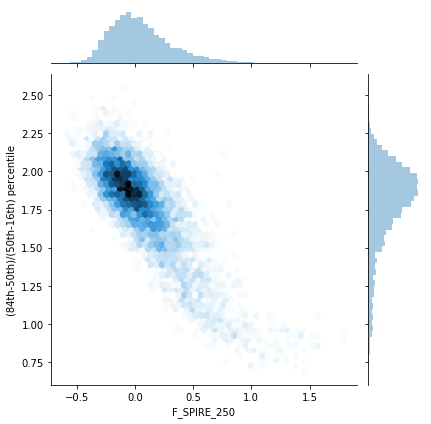

In [6]:
skew=(cat['FErr_SPIRE_250_u']-cat['F_SPIRE_250'])/(cat['F_SPIRE_250']-cat['FErr_SPIRE_250_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_250']),y=skew, kind='hex')

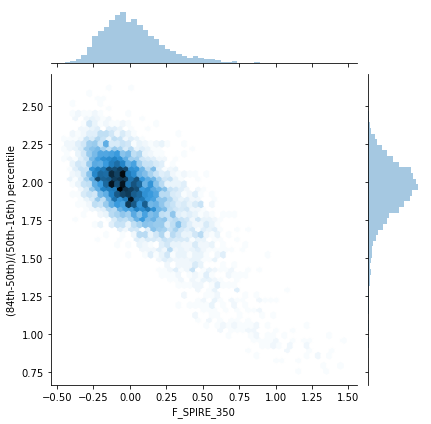

In [7]:
skew=(cat['FErr_SPIRE_350_u']-cat['F_SPIRE_350'])/(cat['F_SPIRE_350']-cat['FErr_SPIRE_350_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_350']),y=skew, kind='hex')

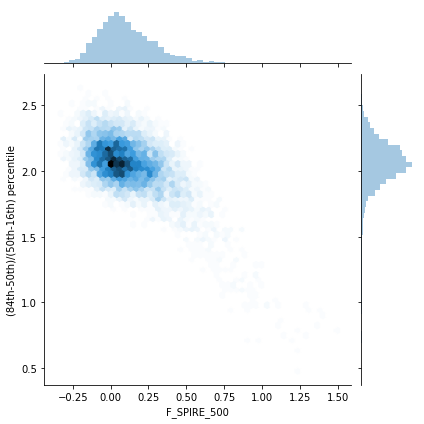

In [9]:
skew=(cat['FErr_SPIRE_500_u']-cat['F_SPIRE_500'])/(cat['F_SPIRE_500']-cat['FErr_SPIRE_500_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_500']),y=skew, kind='hex')

## Add flag to catalogue

In [8]:
from astropy.table import Column
SWIRE_cat.add_column(Column(np.zeros(len(SWIRE_cat), dtype=bool),name='flag_spire_250'))
SWIRE_cat.add_column(Column(np.zeros(len(SWIRE_cat), dtype=bool),name='flag_spire_350'))
SWIRE_cat.add_column(Column(np.zeros(len(SWIRE_cat), dtype=bool),name='flag_spire_500'))

In [9]:
ind_SWIRE_250=(SWIRE_cat['Pval_res_250']>0.5) | (SWIRE_cat['F_SPIRE_250'] < 4)
ind_SWIRE_350=(SWIRE_cat['Pval_res_350']>0.5) | (SWIRE_cat['F_SPIRE_350'] < 4)
ind_SWIRE_500=(SWIRE_cat['Pval_res_500']>0.5) | (SWIRE_cat['F_SPIRE_500'] < 4)


In [10]:
print(ind_SWIRE_250.sum(),ind_SWIRE_350.sum(),ind_SWIRE_500.sum(),len(SWIRE_cat))

26468 31392 32527 52187


In [11]:
SWIRE_cat['flag_spire_250'][ind_SWIRE_250]=True
SWIRE_cat['flag_spire_350'][ind_SWIRE_350]=True
SWIRE_cat['flag_spire_500'][ind_SWIRE_500]=True

In [12]:
SWIRE_cat.write('./data/dmu26_XID+SPIRE_HDF-N_cat_20190315.fits', format='fits',overwrite=True)


### Check Map

In [10]:
from astropy.io import fits
import pylab as plt

In [11]:
Pval=fits.open('./data/dmu26_XID+SPIRE_plw_HDF-N_Bayes_Pval.fits')


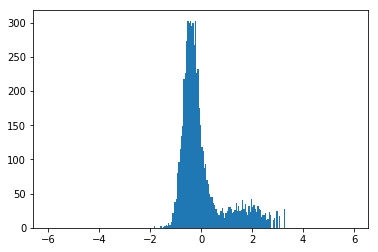

In [12]:
plt.hist(Pval[1].data[np.isfinite(Pval[1].data)],bins=np.arange(-6,6,0.05));

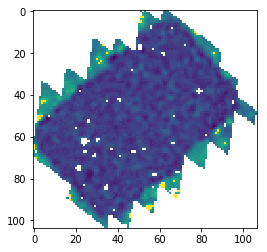

In [13]:
plt.imshow(Pval[1].data)